# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Castro, Denise Kyla B. \
_Student No._: 2022-10832\
_Section_: THV-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: Novermber 11, 2024 and 1:00 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Denise Kyla B. Castro** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

To solve the Lotka-Volterra equations, we make use of the fourth-order Runge-Kutta (RK4) method, which is suitable for solving systems of ordinary differential equations (ODEs). In this model, we are working with two first-order simultaneous differential equations:

$$\begin{equation*}
\frac{dx}{dt} = f_x(x,y,t), \frac{dy}{dt} = f_y(x,y,t)
\end{equation*}$$

where $f_x$ and $f_y$ are nonlinear functions of $x$,$y$, and $t$. We can express these equations in vector notation as:

$$\begin{equation*}
\frac{dr}{dt} = f(r,t)
\end{equation*}$$

where $r = (x,y)$ and $f(r,t) = (f_x(x,y,t),f_y(x,y,t))$.

In RK4, we compute intermediate slopes $k_1$, $k_2$, $k_3$, and $k_4$ using these equations:

$$ \begin{equation*}
k_1 = hf(r,t), 
\end{equation*} $$
$$ \begin{equation*}
k_2 = hf(r+\frac{1}{2}k_1, t+\frac{1}{2}h)
\end{equation*} $$
$$ \begin{equation*}
k_3 = hf(r+\frac{1}{2}k_2, t+\frac{1}{2}h)
\end{equation*} $$
$$ \begin{equation*}
k_4 = hf(r+k_3, t+h)
\end{equation*} $$

Using these, we update $r(t+h)$ as:
$$ \begin{equation*}
r(t+h) = r(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{equation*} $$

where $k_1$, $k_2$, $k_3$, and $k_4$ are slopes at different points within the interval h. This method offers a good balance of high accuracy while using simple equations, with accuracy up to terms of order $h^4$ and an error of order $h^5$.

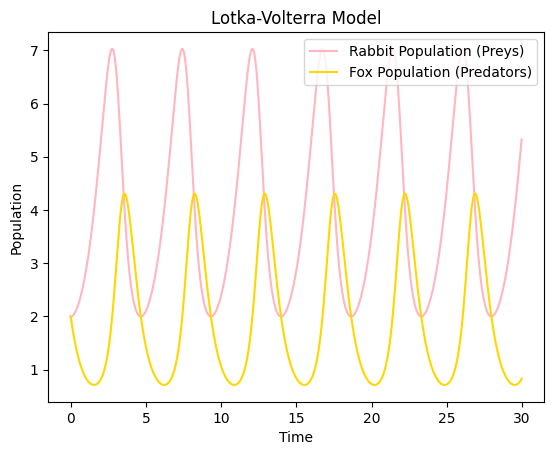

In [ ]:
# Import important libraries
import numpy as np                                                      # library for working with arrays
import matplotlib.pyplot as plt                                         # library for visualization of plots

# 1. Solve equations using RK method given constant values and initial conditon
# Define given constants (positive real parameters describing the interaction of preys and predators)
alpha = 1                                                               # growth rate of preys
beta = 0.5                                                              # death rate of preys
gamma = 0.5                                                             # growth rate of predators
delta = 2                                                               # death rate of predators
r = np.array([2, 2],float)                                              # given initial condition for x and y

def f(r,t):                                                             # defines the functions f(x) and f(y)
    x = r[0]                                                            # x is the first element of r; x = 2
    y = r[1]                                                            # y is the second element of r; y = 2
    fx = alpha*x - beta*x*y                                             # equation for the rate of change of prey population
    fy = gamma*x*y - delta*y                                            # equation for the rate of change of predator population
    return np.array([fx,fy])                                            # returns f(x) and f(y) as arrays

def rk(a,b,N,r):                                                        # defines the Runge-Kutta method
    h = (b - a)/N                                                       # step size
    tpoints = np.arange(a,b,h)                                          # time points from initial time (a) to final time (b) with step size h 
    xpoints = []                                                        # empty list to store prey population over time
    ypoints = []                                                        # empty list to store predator population over time

    for t in tpoints:                                                   # for loop to use Runge-Kutta method
        xpoints.append(r[0])                                            # stores the current value of x
        ypoints.append(r[1])                                            # stores the current value of y
        k1 = h * f(r,t)                                                 # slope calculation at the beginning of the step
        k2 = h * f(r+0.5*k1,t+0.5*h)                                    # slope calculation in the middle of the step
        k3 = h * f(r+0.5*k2,t+0.5*h)                                    # slope calculation in the middle of the step
        k4 = h * f(r+k3,t+h)                                            # slope calculation at the end of the step

        r += (k1+2*k2+2*k3+k4)/6                                        # weighted sum of the slopes

    return xpoints, ypoints, tpoints                                    # returns xpoints, ypoints, tpoints 

# 2 Make graph given t = 0 to  t = 30

a = 0                                                                   # start of interval
b = 30                                                                  # end of interval
N = 1000                                                                # number of steps

xpoints, ypoints, tpoints = rk(a,b,N,r)                                 # run RK method

plt.plot(tpoints, xpoints, label= 'Rabbit Population (Preys)', c = 'lightpink')         # plot of prey population
plt.plot(tpoints, ypoints, label='Fox Population (Predators)', c = 'gold')              # plot of predator population
plt.title('Lotka-Volterra Model')                                                       # title
plt.xlabel('Time')                                                                      # x-label
plt.ylabel('Population')                                                                # y-label
plt.legend()                                                                            # adds legends to the graph
plt.show()                                                                              # shows plot

The graph shows a periodic behavior for both the populations of predator and prey over time, as described by the given ODEs. It can be seen that as the rabbit population increases, the fox population also increases due to greater food availability. However, as the foxes consume more rabbits, the rabbit population declines, which leads to a decrease also in the fox population due to food scarcity. 

For the prey equation, the term $\alpha x$ represents the growth rate of the rabbit population, while $-\beta xy$ accounts for the rate of predation. The predation term shows that as the fox population increases, rabbits are consumed more rapidly. When y decreases to the point when there is less predation, the rabbit population grows exponentially from the $\alpha x$ term.

For the predator equation, $\gamma xy$ represents the growth rate of the fox population, which depends on the availability of rabbits as preys. While $-\delta y$ represents the death rate of foxes. This shows that the fox population increases when there are more rabbits, but declines when the rabbit population decreases.

Due to this, it verifies that the time evolution of the populations reflect the form of the ODEs, as the growth/death rates of each species are influence each other.

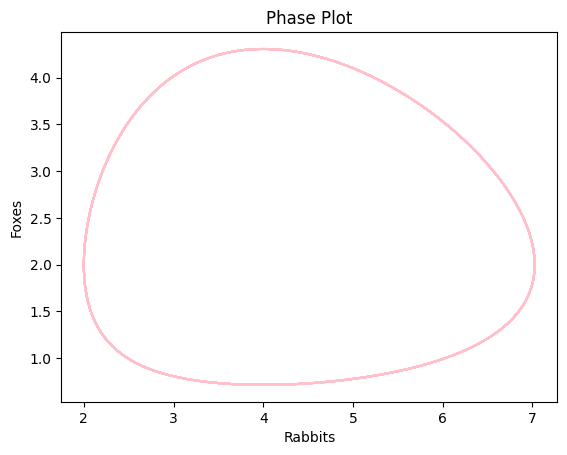

In [4]:
plt.plot(xpoints,ypoints, c='pink')             # plots the relationship between the populations of foxes and rabbits
plt.title('Phase Plot')                         # title
plt.xlabel('Rabbits')                           # x-label
plt.ylabel('Foxes')                             # y-label
plt.show()                                      # shows plot

To further verify the results, the figure above shows the phase-space plot for the predator-prey problem from the given initial conditions. The closed curves in the phase space signify that there is a periodic relationship between the two species. This indicate that the system has a conserved quantity and F(x,y) does not change over time.


### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


To calculate the motion of a nonlinear pendulum, we must first take note the equation of motion for a pendulum which is given by:
$$ \begin{equation*}

\frac{d^2\theta}{dt^2} = -\frac{g}{\ell}sin\theta

\end{equation*}$$

However, this is a second-order nonlinear ODE which is not easily solvable. Thus, we can turn this ODE into two first-order equations which are:

$$ \begin{equation*}

\frac{d\theta}{dt} = \omega, \frac{d\omega}{dt} = -\frac{g}{\ell}sin\theta

\end{equation*}$$

where $\frac{d\theta}{dt}$ is the angular displacement (Eq. 8.45), and $\frac{d\omega}{dt}$ is the angular acceleration (Eq. 8.46).

Since this problem is also a nonlinear ODE with two first-order simultaneous differential equations, we make use of the same equation for the RK4 method from the previous problem with $r = (\theta,\omega)$ and $f(r,t) = (\frac{d\theta}{dt},\frac{d\omega}{dt})$.



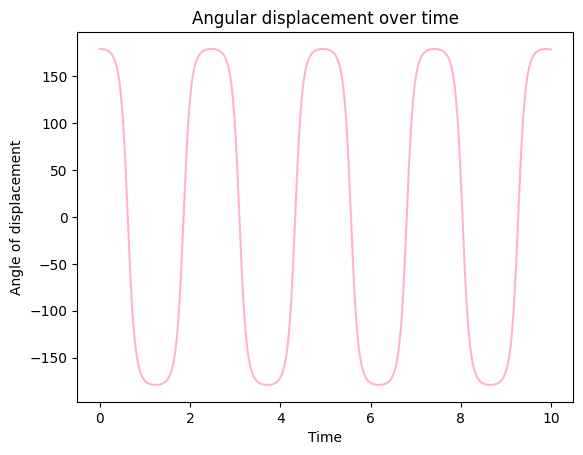

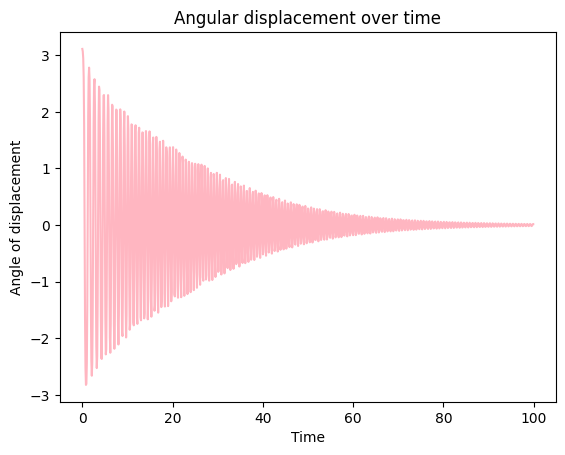

In [9]:
import numpy as np                                                      # library for working with arrays
import matplotlib.pyplot as plt                                         # library for visualization of plots
from math import sin                                                    # imports the sine function from the math library

g = 9.81                                                                # acceleration due to gravity
l = 0.1                                                                 # length of pendulum in meters
r = np.array([np.radians(179.0), 0.0], float)                           # given initial conditions for theta and omega

def f(r,t):                                                             # defines the functions  f(θ) and f(ω)
    theta = r[0]                                                        # first element of r; θ = 179°
    omega = r[1]                                                        # second element of r; ω = 0.0
    f_theta = omega                                                     # angular displacement
    f_omega = -(g/l)*sin(theta)                                         # angular acceleration of a simple pendulum
    return np.array([f_theta,f_omega],float)                            # returns f(θ) and f(ω) as arrays

def rk(a,b,N,r):                                                        # defines the Runge-Kutta method
    h = (b - a)/N                                                       # step size
    tpoints = np.arange(a,b,h)                                          # time points from initial time (a) to final time (b) with step size h 
    theta_points = []                                                   # empty list to store prey population over time
    omega_points = []                                                   # empty list to store predator population over time

    for t in tpoints:                                                   # for loop to use Runge-Kutta method
        theta_points.append(r[0])                                       # stores the current value of x
        omega_points.append(r[1])                                       # stores the current value of y
        k1 = h * f(r,t)                                                 # slope calculation at the beginning of the step
        k2 = h * f(r+0.5*k1,t+0.5*h)                                    # slope calculation in the middle of the step
        k3 = h * f(r+0.5*k2,t+0.5*h)                                    # slope calculation in the middle of the step
        k4 = h * f(r+k3,t+h)                                            # slope calculation at the end of the step

        r += (k1+2*k2+2*k3+k4)/6                                        # weighted sum of the slopes

    return theta_points, omega_points, tpoints                          # returns theta_points, omega_points, tpoints

a = 0.0                                                                 # start of interval
b = 10.0                                                                # end of interval
N = 1000                                                                # number of steps

theta, omega, t = rk(a,b,N,r)                                           # run RK method
theta = np.degrees(theta)                                               # converts theta into degrees

plt.plot(t, theta, c = 'lightpink')                                     # plots the angular displacement over time
plt.xlabel("Time")                                                      # x-label
plt.ylabel("Angle of displacement")                                     # y-label
plt.title("Angular displacement over time")                             # title
plt.show()                                                              # shows plot     

b = 100.0                                                               # extend the interval of t
theta, omega, t = rk(a, b,N, r)                                         # run RK method

plt.plot(t, theta, c= 'lightpink')                                      # plots the angular displacement over time
plt.xlabel('Time')                                                      # x-label
plt.ylabel('Angle of displacement')                                     #y-label
plt.title('Angular displacement over time')                             # title
plt.show()                                                              # shows plot

The first graph shows that the pendulum's angle varies periodically from $+179\degree$ to $-179\degree$. Here, the curves show a non-sinusoidal pattern wherein the pendulum slows down near the extremes and speeds up as it goes through the center. This pattern arises due to the large initial angle, causing the motion to follow $sin\theta$ directly rather than $\theta$ which distinguishes this from the simple harmonic motion (SHM).

Since the first graph doesn't show a decrease in amplitude over time, it suggests that there is no energy loss in the system, which is expected for an undamped oscillation. However, as we increase the time interval, it can be seen (from the second graph) that the amplitude decreases over time. This is due to the limitation of the RK method wherein the numerical errors have accumulated for long simulations making it seem like the system is experiencing damping. Thus, we can conclude that the RK method is a powerful method for shorter timescales but shows inaccuracies for longer simulations.